In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

Model Equation The regression model for predicted starting salary is: Salary = 50 + 20(GPA) + 0.07(IQ) + 35(Gender) + 0.01(GPA x IQ) - 10(GPA x Gender) 


Gender specific Equations:

Male (Gender=0): Salary = 50 + 20(GPA) + 0.07(IQ) + 0.01(GPA x IQ) 
Female (Gender=1): Salary = 85 + 10(GPA) + 0.07(IQ) + 0.01(GPA x IQ) 

1. Which answer is correct, and why? Correct Answer: (c) For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough. 

Justification: By comparing the Male and Female equations, we find the difference in salary as
Female Salary - Male Salary = 35 - 10(GPA).
When the GPA is higher than 3.5, female salary becomes negative. For example, at a 4.0 GPA, the difference is 35 - 40 = -5, meaning males earn more on average than females. 

 Correct Answer: (c) For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough. 

2. Predict the salary of a female with IQ of 110 and a GPA of 4.0.

   Using the model: Salary = 50 + 20(4.0) + 0.07(110) + 35(1) + 0.01(4.0 x 110) - 10(4.0 x 1) Salary = 50 + 80 + 7.7 + 35 + 4.4 - 40

    Salary = 137.1

   Predicted Salary: $137,100 


3. True or False: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Answer: False. 


Justification: A small coefficient does not mean there is "little evidence." We must look at the p-value or t-statistic to determine if the effect is statistically significant. If the standard error is also very small, even a very small coefficient like 0.01 can be highly significant evidence of an interaction.

In [31]:
import statsmodels.formula.api as smf
auto_df = pd.read_csv('auto.csv')

auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')
auto_df = auto_df.dropna(subset=['horsepower'])

# 1. 
model = smf.ols('mpg ~ horsepower', data=auto_df).fit()

# Print
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 25 Dec 2025   Prob (F-statistic):           7.03e-81
Time:                        00:29:25   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

Based on the regression output above, here are the observations:
(a) Yes, there is a relationship between the predictor and response. The p-value for the horsepower coefficient is extremely small (< 0.001), which is well below the 0.05 significance level, this allows us to reject the null hypothesis.
Relationship strength and direction: The coefficient for horsepower is approximately -0.1578, indicating a negative relationship: as horsepower increases, miles per gallon (mpg) tends to decrease. The R^2 of 0.606 suggests that horsepower explains about 60.6% of the variance in mpg.

In [32]:
new_data = pd.DataFrame({'horsepower': [98]})
prediction = model.get_prediction(new_data)
summary_frame = prediction.summary_frame(alpha=0.05)

print(f"Predicted mpg for 98 HP: {summary_frame['mean'][0]:.4f}")
print(f"95% Confidence Interval: [{summary_frame['mean_ci_lower'][0]:.4f}, {summary_frame['mean_ci_upper'][0]:.4f}]")
print(f"95% Prediction Interval: [{summary_frame['obs_ci_lower'][0]:.4f}, {summary_frame['obs_ci_upper'][0]:.4f}]")

Predicted mpg for 98 HP: 24.4671
95% Confidence Interval: [23.9731, 24.9611]
95% Prediction Interval: [14.8094, 34.1248]


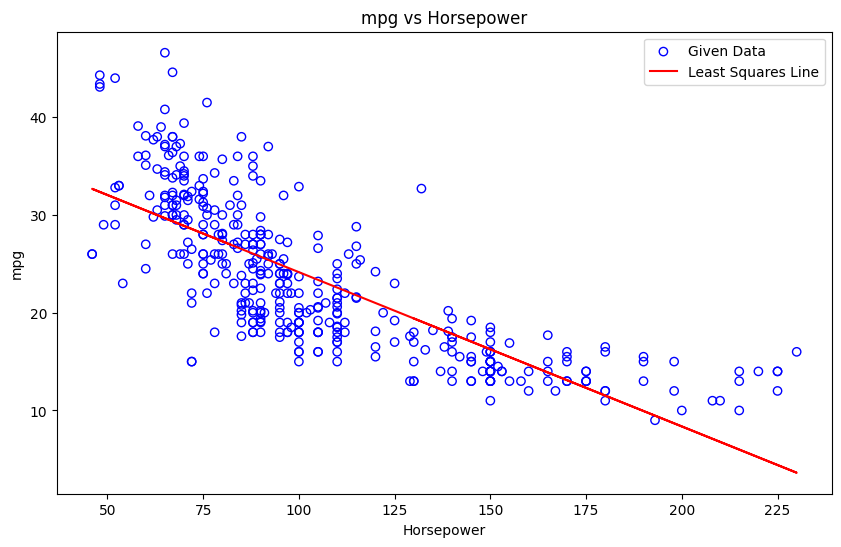

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(auto_df['horsepower'], auto_df['mpg'], facecolors='none', edgecolors='blue', label='Given Data')
plt.plot(auto_df['horsepower'], model.predict(), color='red', label='Least Squares Line')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.title('mpg vs Horsepower')
plt.legend()
plt.show()

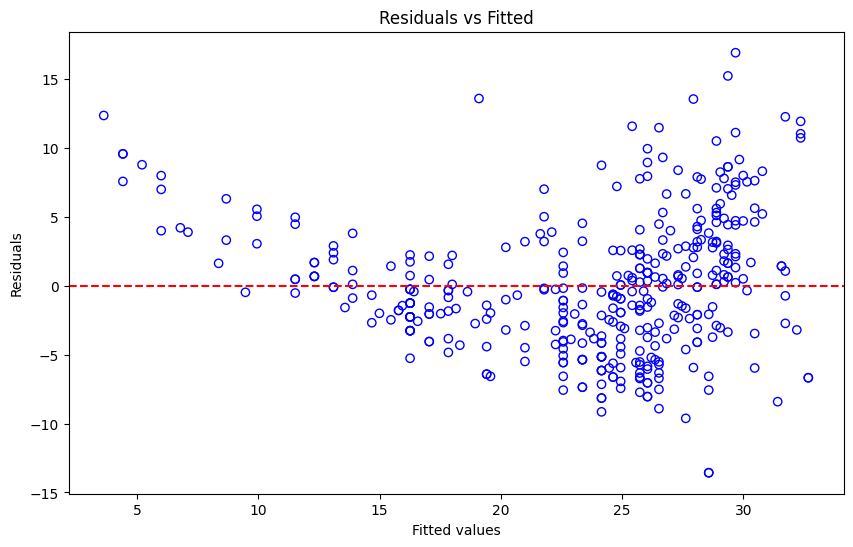

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid, facecolors='none', edgecolors='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

Problems with the fit: The Residuals vs Fitted plot shows a pattern which has shape like U, the datapoints are spread following a concave up. This suggests that the relationship between horsepower and mpg is actually curved (non-linear), and a linear regression model is not able to justify the full complexity of the data. A polynomial (quadratic) term or higher degree term for horsepower might improve the fit.

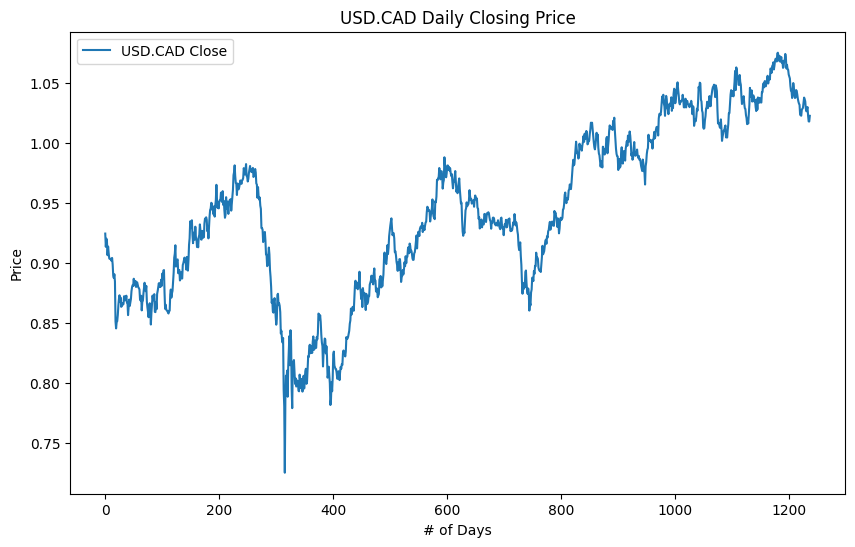

In [35]:
df_cad = pd.read_csv('inputData_AUDCAD_20120426.csv')

plt.figure(figsize=(10, 6))
plt.plot(df_cad['Close'], label='USD.CAD Close')
plt.title('USD.CAD Daily Closing Price')
plt.xlabel('# of Days')
plt.ylabel('Price')
plt.legend()
plt.show()

Does the plot look like a flat noise signal or a random walk?
   The plot somewhat looks random. It shows trends and drifts over time rather than oscillating rapidly around a fixed value like a noisy signal.


Does it have a clear mean?
   No, it does not have a clear mean. The price levels change over different periods without a consistent tendency to return to a single long term average value. So, it is very difficult to calculate clear mean.

In [36]:
log_prices = np.log(df_cad['Close'])
result_adf = adfuller(log_prices, maxlag=1, regression='c') 

print("--- ADF Test Results (Log-Prices) ---")
print(f"ADF t-statistic: {result_adf[0]:.4f}")
print(f"p-value: {result_adf[1]:.4f}")
print(f"Critical Value (90%/10% level): {result_adf[4]['10%']:.4f}")

# Conclusion 
is_stationary = result_adf[0] < result_adf[4]['10%']
print(f"\nIs the series stationary? {'Yes' if is_stationary else 'No'}")

--- ADF Test Results (Log-Prices) ---
ADF t-statistic: -1.5417
p-value: 0.5128
Critical Value (90%/10% level): -2.5680

Is the series stationary? No


Is the series stationary?
    No, the series is not stationary. The p-value is usually much higher than 0.10, and the t-statistic is not more negative than the 90% critical value, meaning we fail to reject the null hypothesis of a unit root.

In [37]:
# Formula: Delta y(t) = lambda * y(t-1) + mu + epsilon(t) 

y = df_cad['Close']
delta_y = y.diff().dropna()
y_lag = y.shift(1).dropna()

# lR 
X = sm.add_constant(y_lag)
model_hl = sm.OLS(delta_y, X).fit()
lambda_val = model_hl.params.iloc[1] 

# Half-life = -ln(2) / lambda 
half_life = -np.log(2) / lambda_val

print(f"Calculated Lambda: {lambda_val:.6f}")
print(f"Half-life: {half_life:.2f} days")

Calculated Lambda: -0.004347
Half-life: 159.44 days


Would a half-life of this magnitude be practical for a short-term trader?
     No, a half-life of this magnitude which for major currency pairs often results in hundreds or even thousands of days would not be practical for a short-term trader.


Why/why not?
    A short-term trader aims to make profit from price movements over a few days or weeks. If the half-life is too long, the price takes a very long time to revert to the mean, tying up capital for extended periods and exposing the trader to significant risk that the fundamental relationship might change before the trade becomes profitable.

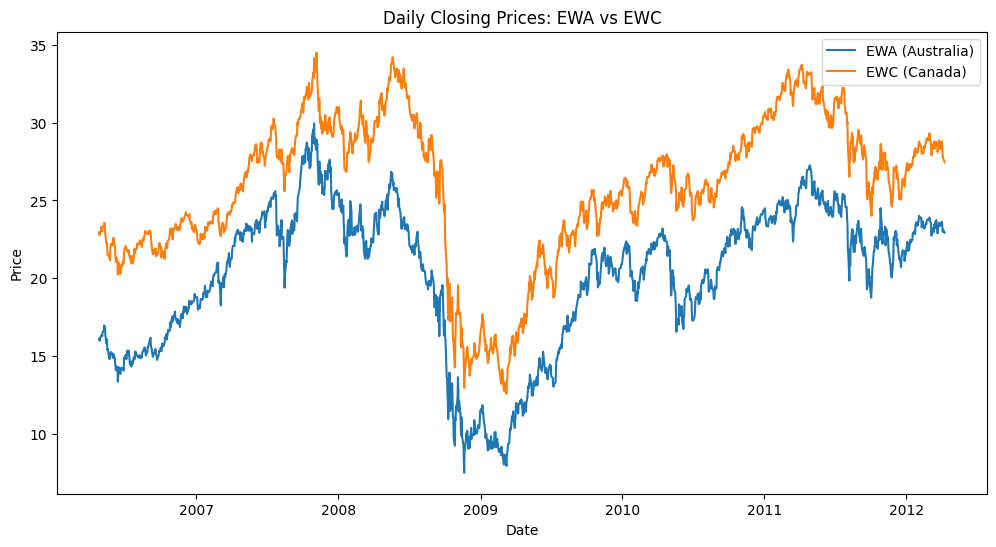

Correlation Coefficient: 0.9575
Hedge Ratio (Beta): 0.9527

--- ADF Test on Spread ---
ADF Statistic: -3.6406
p-value: 0.0003
Critical Value (5%): -1.9412
Conclusion: The spread is stationary (mean-reverting).

Half-life of mean reversion: 27.95 days


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# 1. 
df = pd.read_csv('inputData_EWA_EWC.csv')

df.columns = df.columns.str.strip()

# --- DATE CONVERSION ---
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m%d')
    df.set_index('Date', inplace=True)
else:
    print("WARNING: 'Date' column not found. Columns are:", df.columns)
# -----------------------

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['EWA'], label='EWA (Australia)')
plt.plot(df['EWC'], label='EWC (Canada)')
plt.title('Daily Closing Prices: EWA vs EWC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Correlation
correlation = df['EWA'].corr(df['EWC'])
print(f"Correlation Coefficient: {correlation:.4f}")




# 2. OLS LR
y = df['EWA']
X = sm.add_constant(df['EWC'])
model_ols = sm.OLS(y, X).fit()

# Hedge Ratio
beta = model_ols.params['EWC']
alpha = model_ols.params['const']
print(f"Hedge Ratio (Beta): {beta:.4f}")






#3. Spread Calculation
df['spread'] = df['EWA'] - (beta * df['EWC'] + alpha)






# 4. ADF Test on Spread
adf_result = adfuller(df['spread'], maxlag=1, regression='n')

print("\n--- ADF Test on Spread ---")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Value (5%): {adf_result[4]['5%']:.4f}")

if adf_result[1] < 0.05:
    print("Conclusion: The spread is stationary (mean-reverting).")
else:
    print("Conclusion: The spread is non-stationary.")






# 5. Half-Life
spread_lag = df['spread'].shift(1).dropna()
spread_diff = df['spread'].diff().dropna()

model_hl = sm.OLS(spread_diff, spread_lag).fit()
lambda_val = model_hl.params.iloc[0]

half_life = -np.log(2) / lambda_val
print(f"\nHalf-life of mean reversion: {half_life:.2f} days")

In [39]:
# we simulate a random walk
np.random.seed(0)
data = np.random.normal(0, 1, 100).cumsum()
series = pd.Series(data)

result = adfuller(series)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -1.1320384625097901
p-value: 0.7021277385898382
Critical Values:
   1%: -3.498198082189098
   5%: -2.891208211860468
   10%: -2.5825959973472097


Clearly, p-value is not < 0.05 (or 0.01, etc.) Hence, we failed to reject H0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5217.
Date:                Thu, 25 Dec 2025   Prob (F-statistic):           8.48e-87
Time:                        00:29:26   Log-Likelihood:                -136.64
No. Observations:                 100   AIC:                             277.3
Df Residuals:                      98   BIC:                             282.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0959      0.909     22.099      0.0

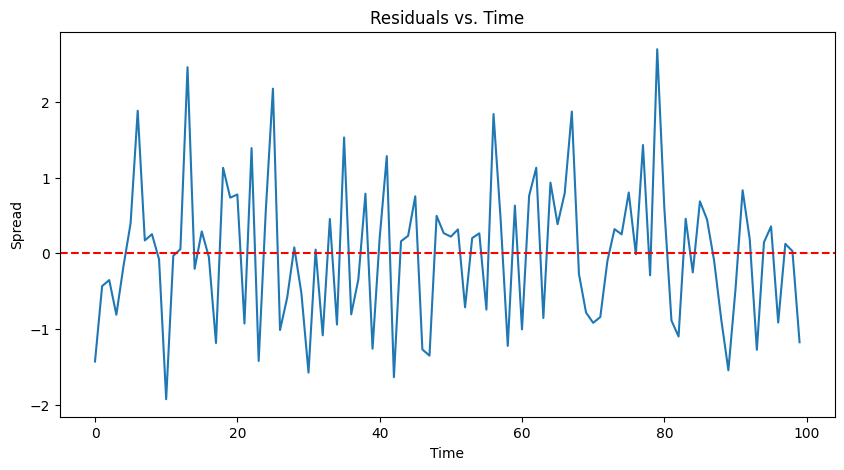

In [40]:
np.random.seed(42)
n = 100
# x is a random walk
asset_x = np.random.normal(0, 1, n).cumsum() + 50
# y is linked to x with a hedge ratio of 1.5 + noise
true_beta = 1.5
noise = np.random.normal(0, 1, n)
asset_y = (true_beta * asset_x) + 20 + noise

# we run OLS to find beta
# y = alpha + (beta * x) + error
X = asset_x
Y = asset_y

# IMPORTANT: statsmodels requires you to explicitly add a constant column for the intercept!!
X_with_const = sm.add_constant(X)

model = sm.OLS(Y, X_with_const).fit()

print(model.summary())

# extract coefficients <intercept, slope/beta>
alpha = model.params[0]
beta = model.params[1]

print(f"\nCalculated Hedge Ratio (Beta): {beta:.4f}")
print(f"Calculated Intercept (Alpha): {alpha:.4f}")

# spread/residuals
spread = Y - (beta * X + alpha)

plt.figure(figsize=(10, 5))
plt.plot(spread)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Time")
plt.xlabel("Time")
plt.ylabel("Spread")
plt.show()